In [21]:
import nltk

In [22]:
import wordcloud

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
import re 
import tweepy 
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tweepy import OAuthHandler 

[nltk_data] Downloading package punkt to C:\Users\Abhay
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhay
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:

from textblob import TextBlob

In [26]:
from tweepy import OAuthHandler 

In [27]:
def connect():
  
  api_key = "QWzrlzxF2PXWbB4E5lmO436Bb"
  api_secret = "8FihxsmIdHF2mArm2j55NCZD8eLB937t3EmwKkkqBgWmmPICce"
  access_token = "1509401508567449604-UwUs7zjzYCSVB4ZAP7zXDKR29KZzUC"
  access_token_secret = "CVIP3Gaj3hslo8sRteX6OcEt1QVdU4yV7toxIdXWtnqmo"

  try:
    auth = OAuthHandler(api_key, api_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api
  except:
    print("Error")
    exit(1)

In [28]:
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+',"",str(text)) #removing @ strings
  text = re.sub(r'#','',str(text)) #removing #
  text = re.sub(r'RT[\s]+','',str(text)) #removing re-tweets
  text = re.sub(r'http\S+|https\S+','',str(text)) #removing links
  text = re.sub('\n', '', text) #removing \n
  text = [word for word in text.split(' ') if word not in stopwords.words()] #removing stopwords
  text=" ".join(text)
  text = [stem(word) for word in text.split(' ')] #stemming
  text=" ".join(text)

  return text

In [29]:
def stem(text):
  # This function is used to stem the given sentence
  porter = PorterStemmer()
  token_words = word_tokenize(text)
  stem_sentence = []
  for word in token_words:
    stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

In [30]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
  if cleaned_text.sentiment.polarity > 0:
    return 'positive'
  elif cleaned_text.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'

In [31]:
def fetch_tweets(query, count = 50):
  api = connect() # Gets the tweepy API object
  tweets = [] # Empty list that stores all the tweets

  try:
    # Fetches the tweets using the api
    fetched_data = tweepy.Cursor(api.search_tweets, q = query + ' -filter:retweets').items(count)
    for tweet in fetched_data:
      txt = tweet.text
      clean_txt = cleanText(TextBlob(txt)) # Cleans the tweet
      stem_txt = TextBlob(stem(clean_txt)) # Stems the tweet
      sent = sentiment(stem_txt) # Gets the sentiment from the tweet
      polar = TextBlob(clean_txt).sentiment.polarity
      subject = TextBlob(clean_txt).sentiment.subjectivity
      tweets.append((txt, clean_txt, sent, polar, subject))
    return tweets
  except tweepy.errors.TweepyException as e:
    print("Error : " + str(e))
    exit(1)

In [35]:
query = '#JohnnyDeppVsAmberHeardTrial'
tweets = fetch_tweets(query = str(query), count = 2000)
# Converting the list into a pandas Dataframe
df = pd.DataFrame(tweets, columns= ['Tweets', 'Clean Tweets','Sentiment', 'Polarity', 'Subjectivity'])

df

,Tweets,Clean Tweets,Sentiment,Polarity,Subjectivity
0,Aquamaaaan. #amberheardisapsychopath #JohnnyDe...,aquamaaaan . amberheardisapsychopath johnnydep...,neutral,0.0000,0.000000
1,Copy and paste! #JusticeForJohnnyDepp #JohnnyD...,copi past ! justiceforjohnnydepp johnnydeppvsa...,negative,-0.3125,0.250000
2,3 is the magic number apparently… wonder why t...,3 magic number apparently… wonder cut time 🤔de...,positive,0.5000,1.000000
3,@DrProudman 🤣🤣🤣🤣 Oh my goodness you sound DESP...,🤣🤣🤣🤣 oh good sound desper ! i would if she ev...,positive,0.6000,0.500000
4,#Deppvsheard #JohnnyDeppVsAmberHeardTrial #Jus...,deppvsheard johnnydeppvsamberheardtri justicef...,neutral,0.0000,0.000000
...,...,...,...,...,...
1995,Why do i feel Camille is about to say \nObject...,whi feel camil say object annoy ! ! ! 😂😂johnny...,neutral,0.0000,0.000000
1996,Elizabeth Marz's deposition is from 2019. Do y...,elizabeth marz 's deposit 2019 . do think thre...,neutral,0.0000,0.000000
1997,She got frightened of a man with glass of wine...,she got frighten glass wine justiceforjohnnyde...,neutral,0.0000,0.000000
1998,Well someone's here to gain publicity for hers...,well someon 's gain public joke busi . lizmarz...,neutral,0.0000,0.066667


In [36]:
# Dropping the duplicate values just in case there are some tweets that are copied and then stores the data in a csv file
df = df.drop_duplicates(subset='Clean Tweets')
df.to_csv('data.csv', index= False)
ptweets = df[df['Sentiment'] == 'positive']
p_perc = 100 * len(ptweets)/len(tweets)
ntweets = df[df['Sentiment'] == 'negative']
n_perc = 100 * len(ntweets)/len(tweets)
print(f'Positive tweets {p_perc} %')
print(f'Neutral tweets {100 - p_perc - n_perc} %')
print(f'Negative tweets {n_perc} %')

Positive tweets 21.8 %
Neutral tweets 64.10000000000001 %
Negative tweets 14.1 %


* Exploratory Data Analysis

In [37]:
df.shape

(1883, 5)

In [38]:
df['Sentiment'].value_counts()

neutral     1165
positive     436
negative     282
Name: Sentiment, dtype: int64

**Bar Graph**(Of all the Sentiments in Tweets)

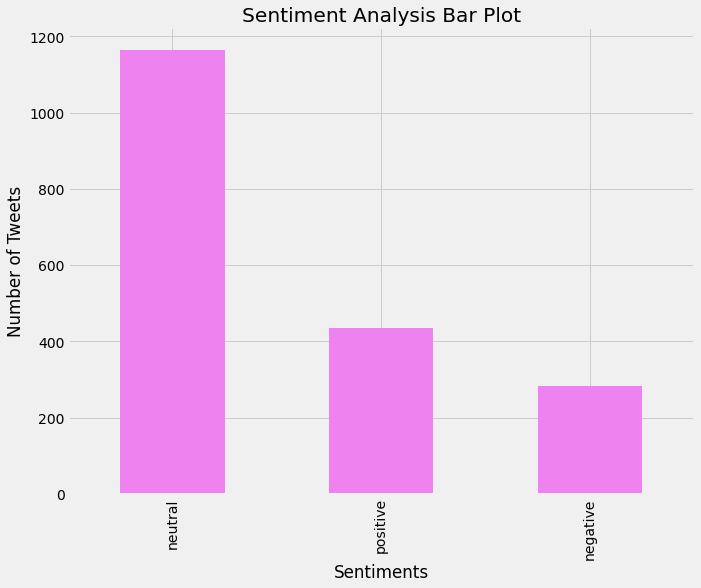

In [48]:
plt.figure(figsize=(10,8))
df['Sentiment'].value_counts().plot(kind = 'bar', color='violet')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiments')
plt.ylabel('Number of Tweets')
plt.show()

**WordCloud**(All Tweets)

(-0.5, 1999.5, 999.5, -0.5)

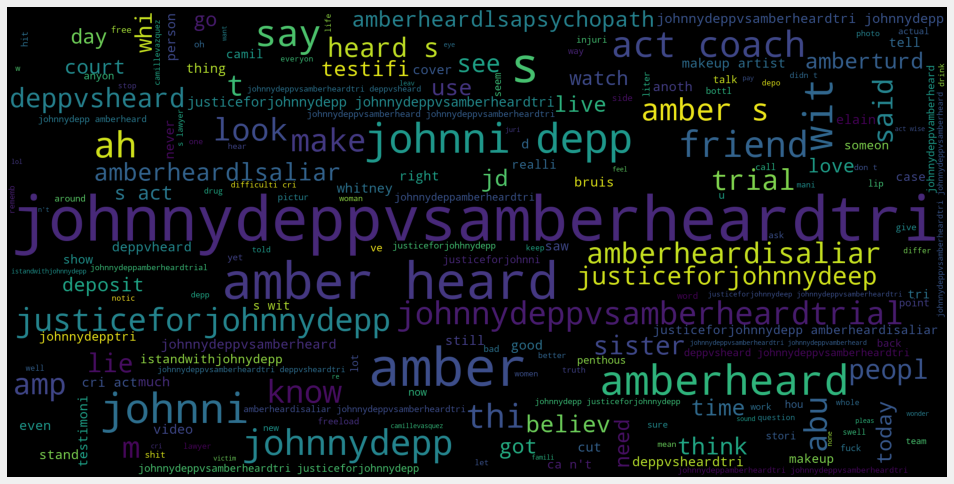

In [39]:
allTweet = ' '.join([i for i in df['Clean Tweets']])
plt.figure(figsize=(15, 9))
wordcloud = WordCloud(width=2000, height=1000, max_font_size=150).generate(allTweet)
plt.imshow(wordcloud)
plt.axis('off')

**WordCloud**(For Positive Tweets)

(-0.5, 1999.5, 999.5, -0.5)

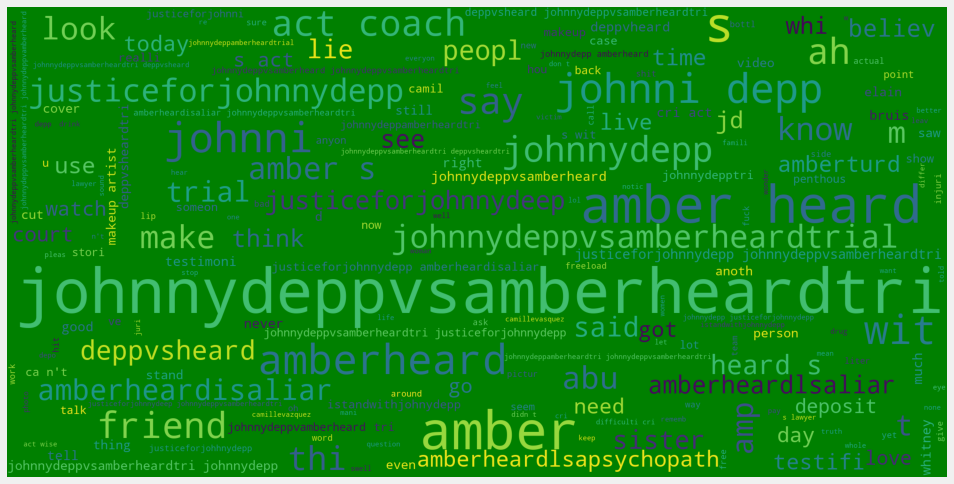

In [40]:
positiveTweet = ' '.join(i for i in df['Clean Tweets'][df['Sentiment'] == 'positive'])
plt.figure(figsize=(15, 9))
wordcloud = WordCloud(width=2000, height=1000, max_font_size=150, background_color='green').generate(allTweet)
plt.imshow(wordcloud)
plt.axis('off')

**WordCloud**(For Negative Tweets)

(-0.5, 1999.5, 999.5, -0.5)

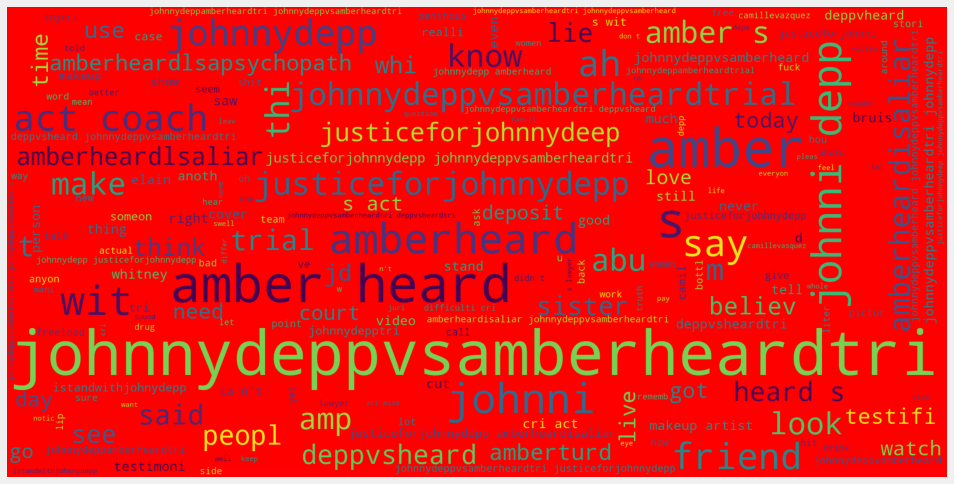

In [42]:
positiveTweet = ' '.join(i for i in df['Clean Tweets'][df['Sentiment'] == 'negative'])
plt.figure(figsize=(15, 9))
wordcloud = WordCloud(width=2000, height=1000, max_font_size=150, background_color='red').generate(allTweet)
plt.imshow(wordcloud)
plt.axis('off')

**ScatterPlot**(For All Tweets)

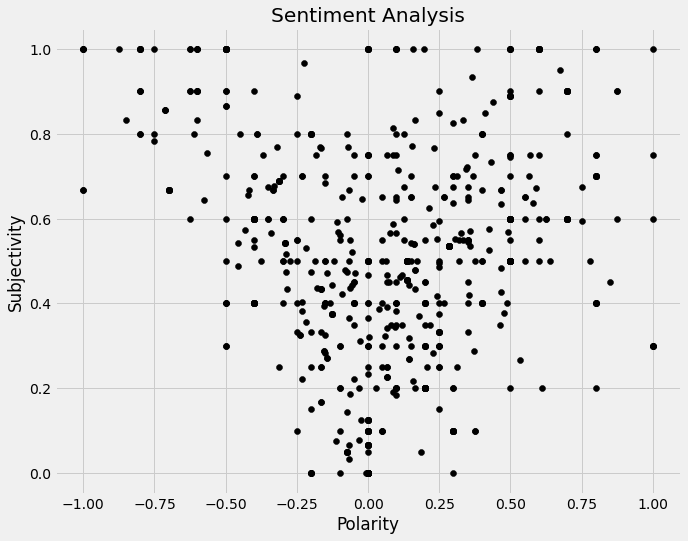

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'],df['Subjectivity'],color='black')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**ScatterPlot**(For Positive Tweets)

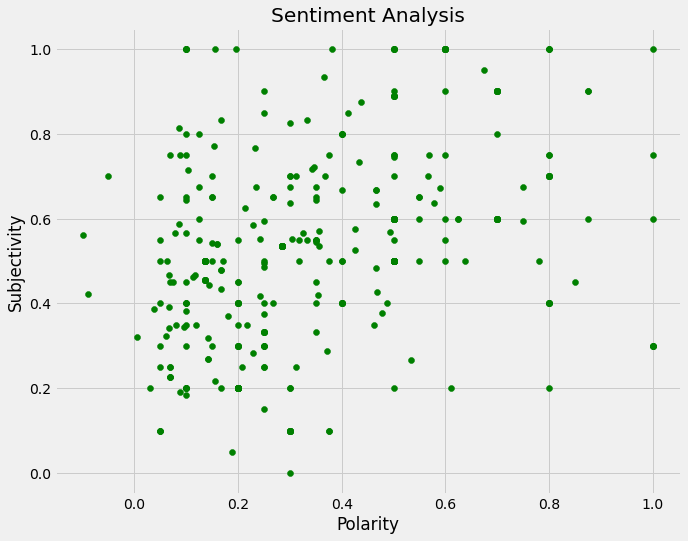

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'][df['Sentiment'] == 'positive'],df['Subjectivity'][df['Sentiment'] == 'positive'],color='green')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**ScatterPlot**(For Negative Tweets)

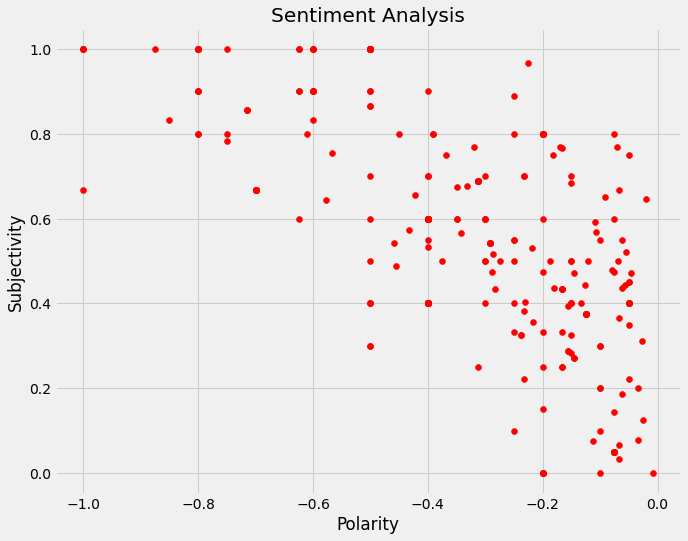

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'][df['Sentiment'] == 'negative'],df['Subjectivity'][df['Sentiment'] == 'negative'],color='Red')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**Kernel Density Plot**

Text(0.5, 0, 'Polarity/Density')

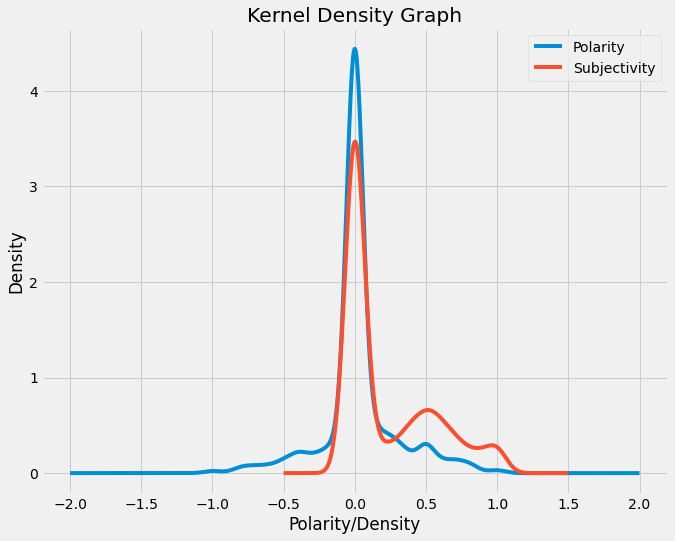

In [63]:
df.plot(kind = 'kde', figsize=(10, 8))
plt.title('Kernel Density Graph')
plt.xlabel('Polarity/Density')